In [23]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.calibration import CalibratedClassifierCV
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
digits = load_digits()

Значення target кожного 100-го зразка

In [156]:
digits.target[::100]

array([0, 4, 1, 7, 4, 8, 2, 2, 4, 4, 1, 9, 7, 3, 2, 1, 2, 5])

In [12]:
digits.data.shape

(1797, 64)

In [13]:
digits.target.shape

(1797,)

In [14]:
digits.images[13]

array([[ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.],
       [ 0.,  4., 13.,  8.,  9., 16.,  8.,  0.],
       [ 0.,  0.,  0.,  6., 14., 15.,  3.,  0.],
       [ 0.,  0.,  0., 11., 14.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2., 15.,  4.,  0.],
       [ 0.,  1.,  5.,  6., 13., 16.,  6.,  0.],
       [ 0.,  2., 12., 12., 13., 11.,  0.,  0.]])

In [15]:
digits.data[13]

array([ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.,  0.,  4., 13.,  8.,  9.,
       16.,  8.,  0.,  0.,  0.,  0.,  6., 14., 15.,  3.,  0.,  0.,  0.,
        0., 11., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0.,
        0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  1.,  5.,  6.,
       13., 16.,  6.,  0.,  0.,  2., 12., 12., 13., 11.,  0.,  0.])

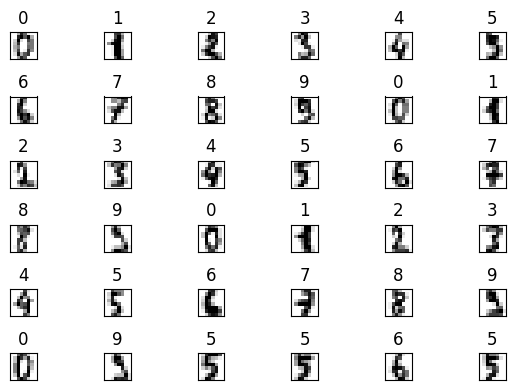

In [16]:
#figure, axes =plt.subplots(nrows=4,ncols=6,figsize=(6, 4))
figure, axes =plt.subplots(nrows=6,ncols=6,figsize=(6, 4))
for item in zip(axes.ravel(), digits.images, digits.target):

    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)

    axes.set_xticks([])
    axes.set_yticks([])

    axes.set_title(target)
plt.tight_layout()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=11, test_size=0.20)
X_train.shape

(1437, 64)

In [18]:
X_test.shape

(360, 64)

In [6]:
knn = KNeighborsClassifier()
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

In [7]:
predicted = knn.predict(X=X_test)
expected = y_test
predicted[:36]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6, 9, 6,
       0, 6, 9, 3, 2, 1, 8, 1, 7, 0, 4, 4, 1, 5])

In [21]:
expected[:36]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6, 9, 6,
       0, 6, 9, 3, 2, 1, 8, 1, 7, 0, 4, 4, 1, 5])

In [22]:
f'{knn.score(X_test, y_test):.2%}'

'98.61%'

In [23]:
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
confusion

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 40,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 27,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 35]])

In [24]:
names = [str(digit) for digit in digits.target_names]
print(classification_report(expected, predicted, target_names=names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        39
           3       1.00      0.95      0.97        41
           4       0.98      0.98      0.98        41
           5       0.96      1.00      0.98        27
           6       1.00      1.00      1.00        30
           7       0.95      1.00      0.97        36
           8       0.97      1.00      0.99        34
           9       1.00      0.95      0.97        37

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [ ]:
pipe = Pipeline([("knn", knn)])
search_space = [{"knn__n_neighbors": [1,2,3,4,5,6,7,8,9,10]}]


In [139]:
classifier = GridSearchCV(pipe, search_space, cv=5, verbose=0).fit(X=X_train, y=y_train)
classifier.best_estimator_.get_params()["knn__n_neighbors"]

4

In [140]:
knn_1 = KNeighborsClassifier(n_neighbors=4, n_jobs=-1)
knn_1.fit(X=X_train, y=y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=4)

In [141]:
print(f'{knn_1.score(X_test, y_test):.2%}')

98.61%


In [151]:
knn_2 = KNeighborsClassifier(n_neighbors=4, weights='distance', metric='minkowski', n_jobs=-1)
knn_2.fit(X=X_train, y=y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=4, weights='distance')

In [152]:
print(f'{knn_2.score(X_test, y_test):.2%}')

98.89%


In [70]:
predicted = knn_2.predict(X=X_test)
expected = y_test
predicted[:36]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6, 9, 6,
       0, 6, 9, 3, 2, 1, 8, 1, 7, 0, 4, 4, 1, 5])

In [71]:
expected[:36]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6, 9, 6,
       0, 6, 9, 3, 2, 1, 8, 1, 7, 0, 4, 4, 1, 5])

In [24]:
svc = SVC(kernel="rbf")
model = svc.fit(X_train, y_train)

In [25]:
predicted = svc.predict(X=X_test)
expected = y_test
predicted[:36]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6, 9, 6,
       0, 6, 9, 3, 2, 1, 8, 1, 7, 0, 4, 4, 1, 5])

In [26]:
expected[:36]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6, 9, 6,
       0, 6, 9, 3, 2, 1, 8, 1, 7, 0, 4, 4, 1, 5])

In [27]:
f'{svc.score(X_test, y_test):.2%}'

'98.61%'

In [28]:
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
confusion

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 38,  0,  1,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 41,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 27,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 36]])

In [29]:
names = [str(digit) for digit in digits.target_names]
print(classification_report(expected, predicted, target_names=names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        39
           3       1.00      0.93      0.96        41
           4       1.00      1.00      1.00        41
           5       0.96      1.00      0.98        27
           6       1.00      1.00      1.00        30
           7       0.95      0.97      0.96        36
           8       0.97      1.00      0.99        34
           9       0.97      0.97      0.97        37

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [45]:
image = Image.open('digit_6.png')
image = image.convert('L')
image = image.resize((8, 8))

image_array = np.array((image) , dtype=np.float32)
image_array *= (16/256)
np.round(image_array, out=image_array)
image_array = 16 - image_array
print(image_array)
image_array = image_array.flatten()

[[0. 0. 4. 6. 4. 0. 0. 0.]
 [0. 4. 5. 2. 4. 6. 1. 0.]
 [0. 7. 1. 0. 0. 2. 0. 0.]
 [0. 8. 6. 5. 4. 2. 0. 0.]
 [1. 8. 2. 1. 2. 7. 3. 0.]
 [1. 7. 0. 0. 0. 6. 3. 0.]
 [0. 7. 2. 1. 4. 6. 0. 0.]
 [0. 2. 6. 6. 5. 0. 0. 0.]]


In [31]:
predicted_digit = knn.predict([image_array])
print(f'Predicted Digit: {predicted_digit[0]}')

Predicted Digit: 0


In [32]:
predicted_digit = svc.predict([image_array])
print(f'Predicted Digit: {predicted_digit[0]}')

Predicted Digit: 5


In [33]:
clf = MultinomialNB()
clf_sigmoid = CalibratedClassifierCV(clf, cv=4, method='isotonic')


In [34]:
model = clf.fit(X_train, y_train)
model_1 = clf_sigmoid.fit(X_train, y_train)

In [35]:
y_pred = clf.predict(X_test)
print(y_pred[:36])
print(y_test[:36])

[0 4 8 9 3 1 4 1 5 0 7 9 4 2 5 3 3 8 5 6 9 4 0 6 9 3 2 1 8 1 7 0 4 4 1 5]
[0 4 9 9 3 1 4 1 5 0 4 9 4 1 5 3 3 8 3 6 9 6 0 6 9 3 2 1 8 1 7 0 4 4 1 5]


In [36]:
y_pred = clf_sigmoid.predict(X_test)
print(y_pred[:36])
print(y_test[:36])

[0 4 8 9 3 1 4 1 5 0 7 9 4 2 5 3 3 8 5 6 9 4 0 6 9 3 2 1 8 1 7 0 4 4 1 5]
[0 4 9 9 3 1 4 1 5 0 4 9 4 1 5 3 3 8 3 6 9 6 0 6 9 3 2 1 8 1 7 0 4 4 1 5]


In [46]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 89.17%


In [47]:
f'{clf.score(X_test, y_test):.2%}'

'88.89%'

In [48]:
f'{clf_sigmoid.score(X_test, y_test):.2%}'

'89.17%'

In [49]:
predicted_digit = clf.predict([image_array])
print(f'Predicted Digit: {predicted_digit[0]}')

Predicted Digit: 5


In [50]:
predicted_digit = clf_sigmoid.predict([image_array])
print(f'Predicted Digit: {predicted_digit[0]}')

Predicted Digit: 5
